<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine/blob/main/Machine_Learning_Tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Tinnitus_ALR_EEG_features_2022.08.06_without gamma.csv")

In [42]:
dataset.head()

,Subjects,Subject Type/Class,Test Type,Gap duration,n0_gap_peak_ms,p1_gap_peak_ms,n1_gap_peak_ms,p2_gap_peak_ms,n2_gap_peak_ms,p3_gap_peak_ms,...,MedianF_Theta,MeanF_Theta,Spectral Edge_Theta,PeakF_Theta,MeanP_Delta,MedianF_Delta,MeanF_Delta,Spectral Edge_Delta,PeakF_Delta,MeanP_Gamma
0,'01_AJW_30_02',Control,Test,20ms,101,147,214,263,366,105,...,3.891054,14.007782,8.560310,4.669262,0.000005,2.334634,8.949416,4.669260,2.334634,6.530000e-07
1,'01_CGO_63_01',Control,Test,20ms,132,155,217,301,383,131,...,4.669264,17.509726,9.727626,4.280158,0.000014,1.945530,10.116732,4.669262,2.723738,4.888000e-06
2,'01_KBJ_45_01',Control,Test,20ms,107,160,221,305,396,128,...,5.447472,20.233462,12.062258,5.836578,0.000064,2.334634,12.840468,6.225684,3.891050,8.334000e-05
3,'02_KCH_26_02',Control,Test,20ms,77,200,233,268,379,166,...,3.112842,13.229570,7.782104,3.891050,0.000198,1.945530,7.782104,5.058368,3.112842,1.680000e-05
4,'03_HMK_49_01',Control,Test,20ms,153,128,224,264,337,147,...,4.280158,12.840468,7.782102,4.669262,0.000018,1.945530,8.949418,4.669262,2.723738,2.378000e-06


In [43]:
#X = dataset.iloc[:, 4:]
#y = dataset.iloc[:, 1]

X = dataset[['p3_gap_peak_amp','gap_auc_n1p2_R','p1_gap_peak_amp','n2_gap_peak_amp','n1p3_interval_nogap','gap_auc_n1p2_L','gap_auc_p1n1_R','p1p2_interval_nogap']]
y = dataset["Subject Type/Class"]

In [44]:
y.value_counts()

Control    172
Patient    158
Name: Subject Type/Class, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
result={}



---





---



#ADABOOST

In [48]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["ADA Default"]=accuracy_score(y_test, y_pred)

[[33  6]
 [16 11]]
              precision    recall  f1-score   support

     Control       0.67      0.85      0.75        39
     Patient       0.65      0.41      0.50        27

    accuracy                           0.67        66
   macro avg       0.66      0.63      0.62        66
weighted avg       0.66      0.67      0.65        66

Accurecy:  0.6666666666666666


1/200 round completed......................... Accurecy: 0.7121212121212122
2/200 round completed......................... Accurecy: 0.7272727272727273
3/200 round completed......................... Accurecy: 0.7272727272727273
4/200 round completed......................... Accurecy: 0.7272727272727273
5/200 round completed......................... Accurecy: 0.7121212121212122
6/200 round completed......................... Accurecy: 0.7121212121212122
7/200 round completed......................... Accurecy: 0.7121212121212122
8/200 round completed......................... Accurecy: 0.7121212121212122
9/200 round completed......................... Accurecy: 0.7121212121212122
10/200 round completed......................... Accurecy: 0.7121212121212122
11/200 round completed......................... Accurecy: 0.7121212121212122
12/200 round completed......................... Accurecy: 0.7121212121212122
13/200 round completed......................... Accurecy: 0.7424242424242424
14/200 r

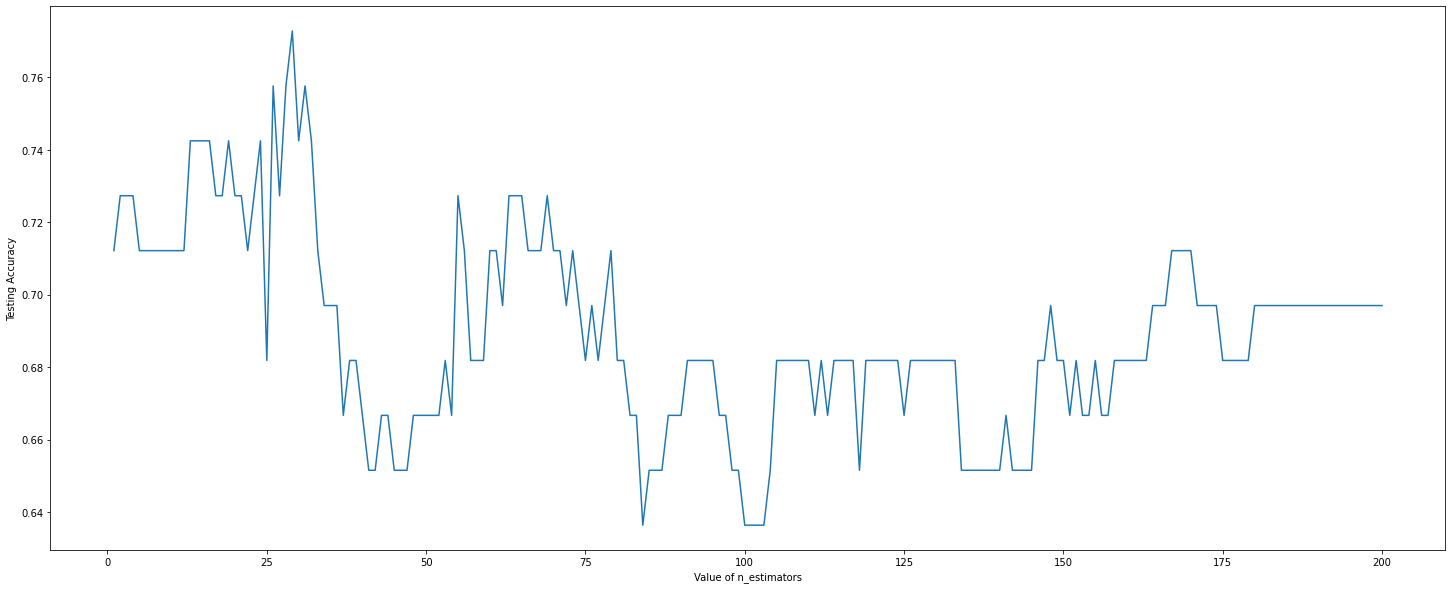

In [49]:
from sklearn.ensemble import AdaBoostClassifier
N=200
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [50]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["ADA Best Estimator"]=accuracy_score(y_test, y_pred)

[[34  5]
 [10 17]]
              precision    recall  f1-score   support

     Control       0.77      0.87      0.82        39
     Patient       0.77      0.63      0.69        27

    accuracy                           0.77        66
   macro avg       0.77      0.75      0.76        66
weighted avg       0.77      0.77      0.77        66

Accurecy:  0.7727272727272727




---



---



#Graddient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

classifier = GradientBoostingClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Graddient Boosting Default"]=accuracy_score(y_test, y_pred)

[[33  6]
 [14 13]]
              precision    recall  f1-score   support

     Control       0.70      0.85      0.77        39
     Patient       0.68      0.48      0.57        27

    accuracy                           0.70        66
   macro avg       0.69      0.66      0.67        66
weighted avg       0.69      0.70      0.68        66

Accurecy:  0.696969696969697


1/150 round completed......................... Accurecy: 0.7727272727272727
2/150 round completed......................... Accurecy: 0.7727272727272727
3/150 round completed......................... Accurecy: 0.7575757575757576
4/150 round completed......................... Accurecy: 0.7575757575757576
5/150 round completed......................... Accurecy: 0.7575757575757576
6/150 round completed......................... Accurecy: 0.7727272727272727
7/150 round completed......................... Accurecy: 0.7727272727272727
8/150 round completed......................... Accurecy: 0.7727272727272727
9/150 round completed......................... Accurecy: 0.7424242424242424
10/150 round completed......................... Accurecy: 0.7878787878787878
11/150 round completed......................... Accurecy: 0.7878787878787878
12/150 round completed......................... Accurecy: 0.7727272727272727
13/150 round completed......................... Accurecy: 0.7878787878787878
14/150 r

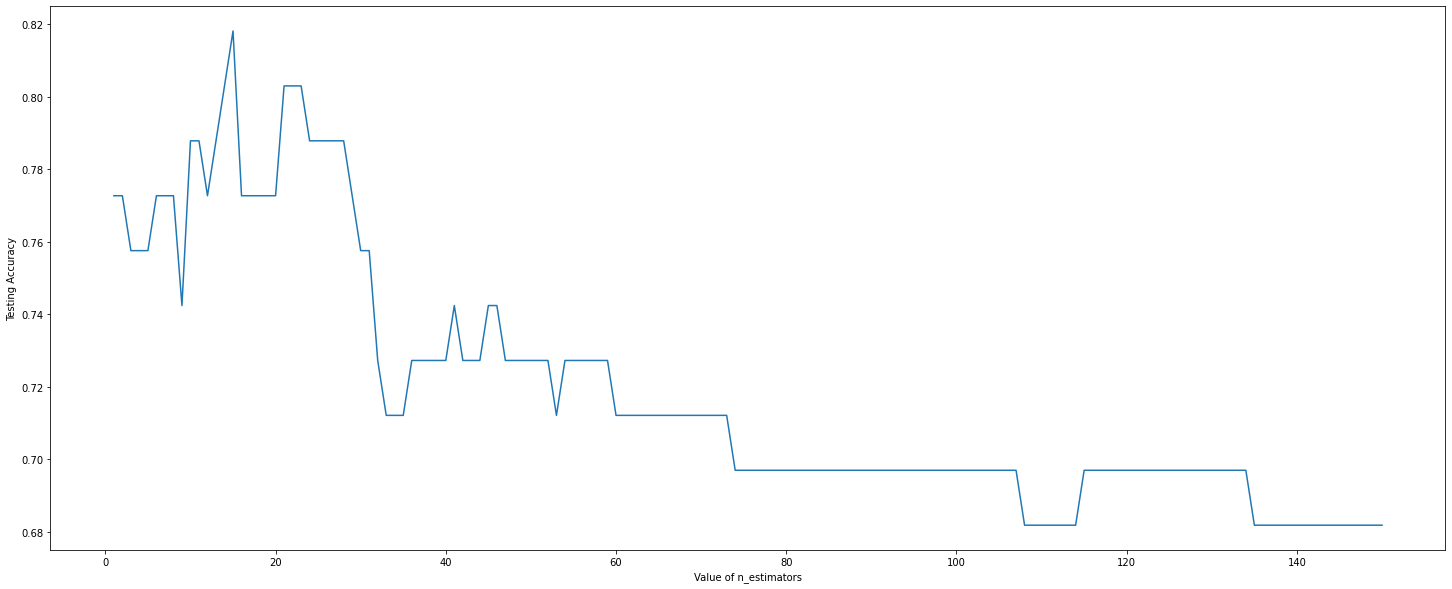

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.696969696969697
2/30 round completed......................... Accurecy: 0.7575757575757576
3/30 round completed......................... Accurecy: 0.696969696969697
4/30 round completed......................... Accurecy: 0.6818181818181818
5/30 round completed......................... Accurecy: 0.696969696969697
6/30 round completed......................... Accurecy: 0.6818181818181818
7/30 round completed......................... Accurecy: 0.7272727272727273
8/30 round completed......................... Accurecy: 0.696969696969697
9/30 round completed......................... Accurecy: 0.6818181818181818
10/30 round completed......................... Accurecy: 0.6060606060606061
11/30 round completed......................... Accurecy: 0.6212121212121212
12/30 round completed......................... Accurecy: 0.6060606060606061
13/30 round completed......................... Accurecy: 0.6060606060606061
14/30 round completed....

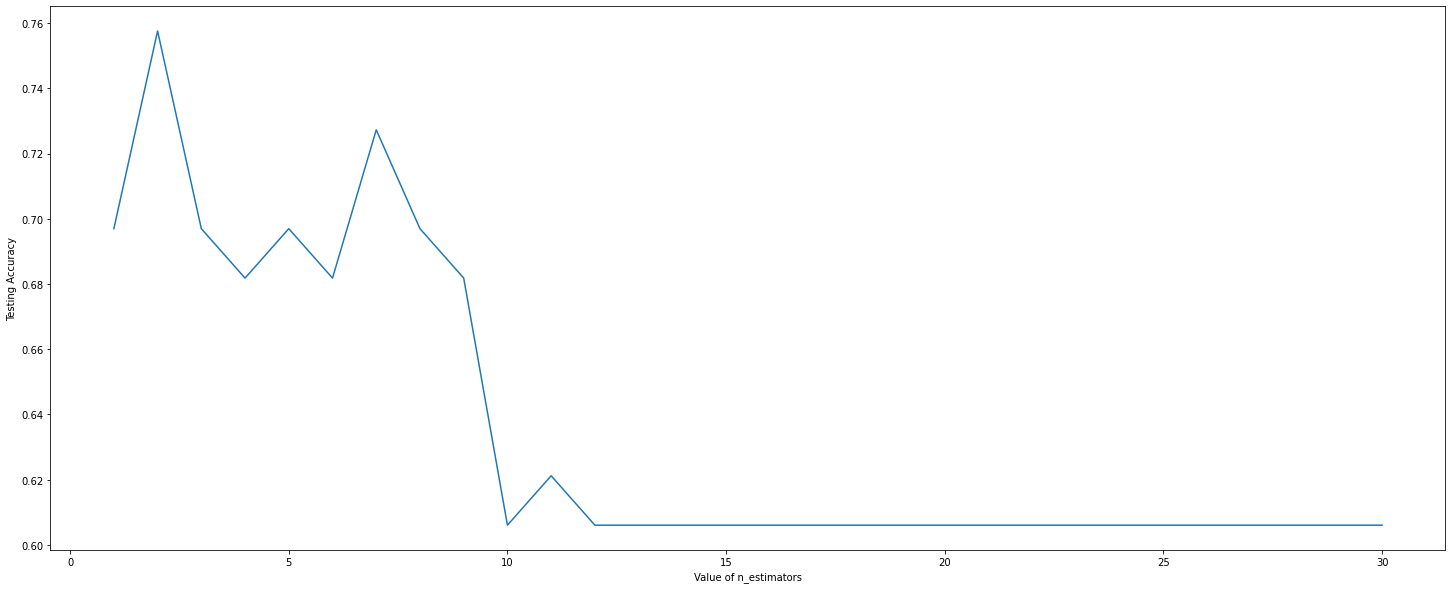

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Graddient Best Estimator"]=accuracy_score(y_test, y_pred)

[[33  6]
 [ 6 21]]
              precision    recall  f1-score   support

     Control       0.85      0.85      0.85        39
     Patient       0.78      0.78      0.78        27

    accuracy                           0.82        66
   macro avg       0.81      0.81      0.81        66
weighted avg       0.82      0.82      0.82        66

Accurecy:  0.8181818181818182


In [55]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result["Graddient Boost Best depth"]=accuracy_score(y_test, y_pred)

[[34  5]
 [11 16]]
              precision    recall  f1-score   support

     Control       0.76      0.87      0.81        39
     Patient       0.76      0.59      0.67        27

    accuracy                           0.76        66
   macro avg       0.76      0.73      0.74        66
weighted avg       0.76      0.76      0.75        66

Accurecy:  0.7575757575757576


In [56]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result["Graddient Boosting ALL"]=accuracy_score(y_test, y_pred)

[[34  5]
 [ 8 19]]
              precision    recall  f1-score   support

     Control       0.81      0.87      0.84        39
     Patient       0.79      0.70      0.75        27

    accuracy                           0.80        66
   macro avg       0.80      0.79      0.79        66
weighted avg       0.80      0.80      0.80        66

Accurecy:  0.803030303030303




---



---



#KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
KNN_class = KNeighborsClassifier()
KNN_class.fit(X_train, y_train)
y_pred=KNN_class.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["KNN Default"]=accuracy_score(y_test, y_pred)

[[32  7]
 [12 15]]
              precision    recall  f1-score   support

     Control       0.73      0.82      0.77        39
     Patient       0.68      0.56      0.61        27

    accuracy                           0.71        66
   macro avg       0.70      0.69      0.69        66
weighted avg       0.71      0.71      0.71        66

Accurecy:  0.7121212121212122


1/200 round completed......................... Accurecy: 0.6666666666666666
2/200 round completed......................... Accurecy: 0.696969696969697
3/200 round completed......................... Accurecy: 0.6818181818181818
4/200 round completed......................... Accurecy: 0.696969696969697
5/200 round completed......................... Accurecy: 0.7121212121212122
6/200 round completed......................... Accurecy: 0.6515151515151515
7/200 round completed......................... Accurecy: 0.696969696969697
8/200 round completed......................... Accurecy: 0.7424242424242424
9/200 round completed......................... Accurecy: 0.7121212121212122
10/200 round completed......................... Accurecy: 0.7272727272727273
11/200 round completed......................... Accurecy: 0.7272727272727273
12/200 round completed......................... Accurecy: 0.7121212121212122
13/200 round completed......................... Accurecy: 0.7424242424242424
14/200 roun

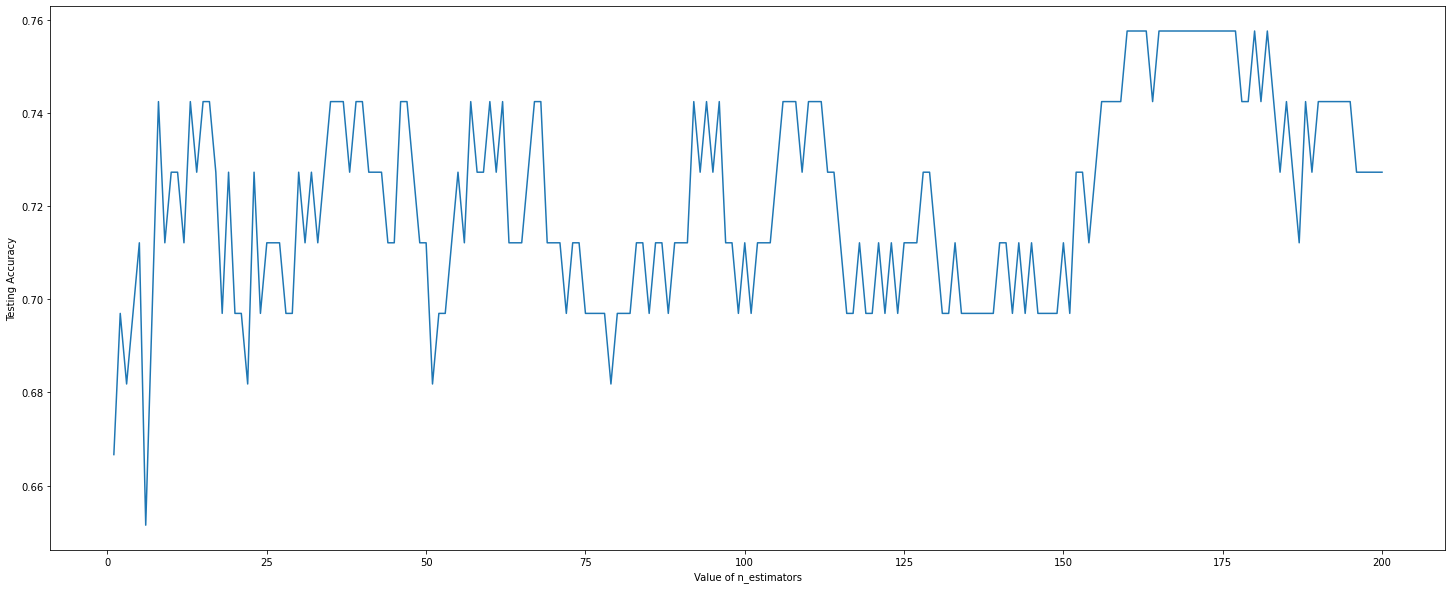

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=200
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
KNN_class = KNeighborsClassifier(n_neighbors=best)
KNN_class.fit(X_train, y_train)
y_pred=KNN_class.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["KNN Best Neighbors"]=accuracy_score(y_test, y_pred)

[[32  7]
 [ 9 18]]
              precision    recall  f1-score   support

     Control       0.78      0.82      0.80        39
     Patient       0.72      0.67      0.69        27

    accuracy                           0.76        66
   macro avg       0.75      0.74      0.75        66
weighted avg       0.76      0.76      0.76        66

Accurecy:  0.7575757575757576




---



---



#Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Random Forest Default"]=accuracy_score(y_test, y_pred)

[[32  7]
 [11 16]]
              precision    recall  f1-score   support

     Control       0.74      0.82      0.78        39
     Patient       0.70      0.59      0.64        27

    accuracy                           0.73        66
   macro avg       0.72      0.71      0.71        66
weighted avg       0.72      0.73      0.72        66

Accurecy:  0.7272727272727273


1/150 round completed......................... Accurecy: 0.6212121212121212
2/150 round completed......................... Accurecy: 0.7272727272727273
3/150 round completed......................... Accurecy: 0.7272727272727273
4/150 round completed......................... Accurecy: 0.803030303030303
5/150 round completed......................... Accurecy: 0.7878787878787878
6/150 round completed......................... Accurecy: 0.7878787878787878
7/150 round completed......................... Accurecy: 0.7575757575757576
8/150 round completed......................... Accurecy: 0.7727272727272727
9/150 round completed......................... Accurecy: 0.7424242424242424
10/150 round completed......................... Accurecy: 0.7424242424242424
11/150 round completed......................... Accurecy: 0.7424242424242424
12/150 round completed......................... Accurecy: 0.7424242424242424
13/150 round completed......................... Accurecy: 0.7424242424242424
14/150 ro

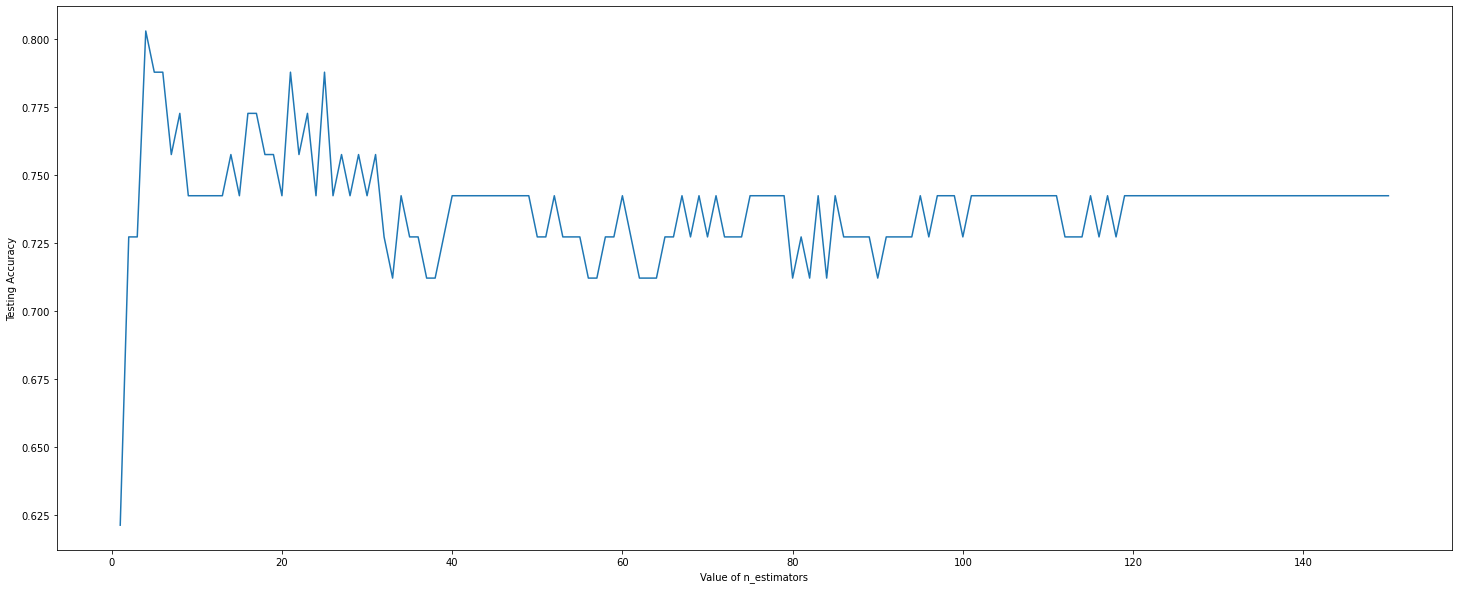

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/150 round completed......................... Accurecy: 0.7424242424242424
2/150 round completed......................... Accurecy: 0.7272727272727273
3/150 round completed......................... Accurecy: 0.7272727272727273
4/150 round completed......................... Accurecy: 0.7878787878787878
5/150 round completed......................... Accurecy: 0.7878787878787878
6/150 round completed......................... Accurecy: 0.7272727272727273
7/150 round completed......................... Accurecy: 0.696969696969697
8/150 round completed......................... Accurecy: 0.7272727272727273
9/150 round completed......................... Accurecy: 0.7272727272727273
10/150 round completed......................... Accurecy: 0.7424242424242424
11/150 round completed......................... Accurecy: 0.7272727272727273
12/150 round completed......................... Accurecy: 0.7424242424242424
13/150 round completed......................... Accurecy: 0.7424242424242424
14/150 ro

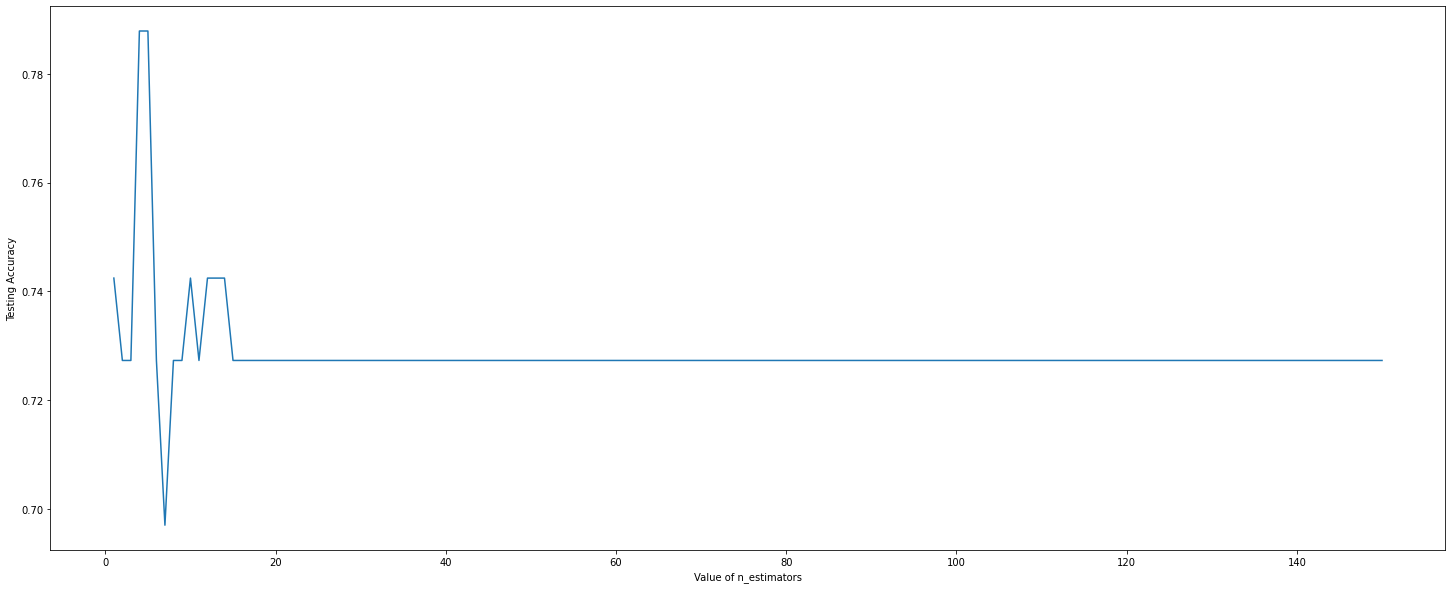

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [63]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Random Forest Best Estimator"]=accuracy_score(y_test, y_pred)

[[33  6]
 [ 7 20]]
              precision    recall  f1-score   support

     Control       0.82      0.85      0.84        39
     Patient       0.77      0.74      0.75        27

    accuracy                           0.80        66
   macro avg       0.80      0.79      0.80        66
weighted avg       0.80      0.80      0.80        66

Accurecy:  0.803030303030303


In [64]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=best_depth,random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Random Forest Best Max Depth"]=accuracy_score(y_test, y_pred)

[[31  8]
 [ 6 21]]
              precision    recall  f1-score   support

     Control       0.84      0.79      0.82        39
     Patient       0.72      0.78      0.75        27

    accuracy                           0.79        66
   macro avg       0.78      0.79      0.78        66
weighted avg       0.79      0.79      0.79        66

Accurecy:  0.7878787878787878


In [65]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Random Forest All"]=accuracy_score(y_test, y_pred)

[[30  9]
 [ 3 24]]
              precision    recall  f1-score   support

     Control       0.91      0.77      0.83        39
     Patient       0.73      0.89      0.80        27

    accuracy                           0.82        66
   macro avg       0.82      0.83      0.82        66
weighted avg       0.83      0.82      0.82        66

Accurecy:  0.8181818181818182




---



---



#XGB

In [66]:


import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(random_state=0)
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["XGB Deafult"]=accuracy_score(y_test, y_pred)

[[33  6]
 [13 14]]
              precision    recall  f1-score   support

     Control       0.72      0.85      0.78        39
     Patient       0.70      0.52      0.60        27

    accuracy                           0.71        66
   macro avg       0.71      0.68      0.69        66
weighted avg       0.71      0.71      0.70        66

Accurecy:  0.7121212121212122


1/250 round completed......................... Accurecy: 0.7727272727272727
2/250 round completed......................... Accurecy: 0.7727272727272727
3/250 round completed......................... Accurecy: 0.8181818181818182
4/250 round completed......................... Accurecy: 0.8181818181818182
5/250 round completed......................... Accurecy: 0.803030303030303
6/250 round completed......................... Accurecy: 0.8333333333333334
7/250 round completed......................... Accurecy: 0.8333333333333334
8/250 round completed......................... Accurecy: 0.803030303030303
9/250 round completed......................... Accurecy: 0.7878787878787878
10/250 round completed......................... Accurecy: 0.803030303030303
11/250 round completed......................... Accurecy: 0.803030303030303
12/250 round completed......................... Accurecy: 0.7878787878787878
13/250 round completed......................... Accurecy: 0.7878787878787878
14/250 round

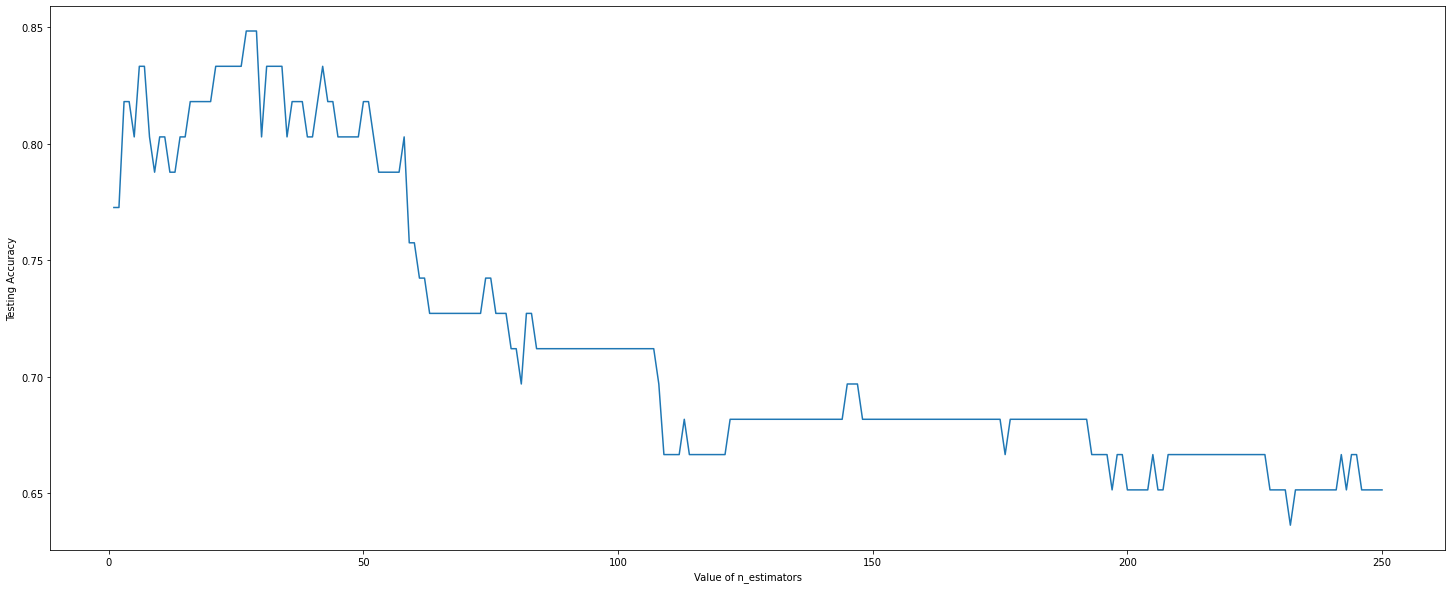

In [67]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/250 round completed......................... Accurecy: 0.7424242424242424
2/250 round completed......................... Accurecy: 0.7727272727272727
3/250 round completed......................... Accurecy: 0.7121212121212122
4/250 round completed......................... Accurecy: 0.696969696969697
5/250 round completed......................... Accurecy: 0.696969696969697
6/250 round completed......................... Accurecy: 0.7272727272727273
7/250 round completed......................... Accurecy: 0.6818181818181818
8/250 round completed......................... Accurecy: 0.7424242424242424
9/250 round completed......................... Accurecy: 0.696969696969697
10/250 round completed......................... Accurecy: 0.696969696969697
11/250 round completed......................... Accurecy: 0.6818181818181818
12/250 round completed......................... Accurecy: 0.6818181818181818
13/250 round completed......................... Accurecy: 0.6818181818181818
14/250 round

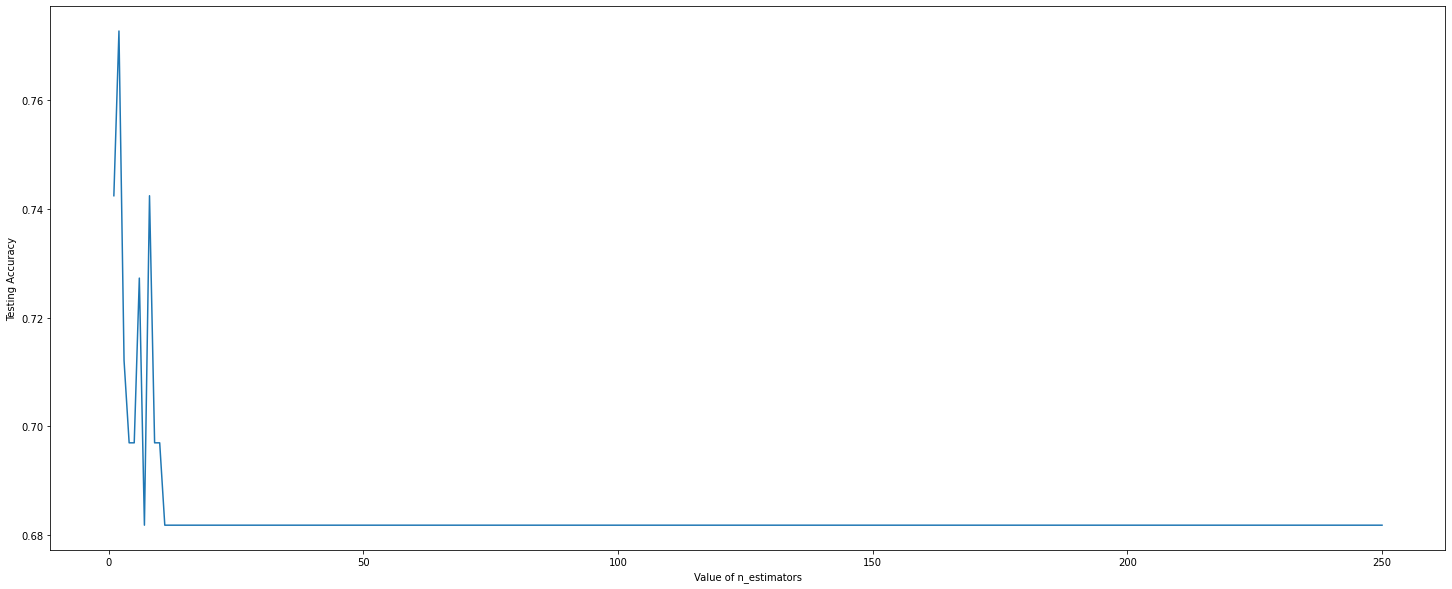

In [68]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [69]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["XGB Best Depth"]=accuracy_score(y_test, y_pred)

[[34  5]
 [10 17]]
              precision    recall  f1-score   support

     Control       0.77      0.87      0.82        39
     Patient       0.77      0.63      0.69        27

    accuracy                           0.77        66
   macro avg       0.77      0.75      0.76        66
weighted avg       0.77      0.77      0.77        66

Accurecy:  0.7727272727272727


In [70]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["XGB Best Estimator"]=accuracy_score(y_test, y_pred)

[[35  4]
 [ 6 21]]
              precision    recall  f1-score   support

     Control       0.85      0.90      0.88        39
     Patient       0.84      0.78      0.81        27

    accuracy                           0.85        66
   macro avg       0.85      0.84      0.84        66
weighted avg       0.85      0.85      0.85        66

Accurecy:  0.8484848484848485


In [71]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["XGB Best ALL"]=accuracy_score(y_test, y_pred)

[[34  5]
 [ 9 18]]
              precision    recall  f1-score   support

     Control       0.79      0.87      0.83        39
     Patient       0.78      0.67      0.72        27

    accuracy                           0.79        66
   macro avg       0.79      0.77      0.77        66
weighted avg       0.79      0.79      0.78        66

Accurecy:  0.7878787878787878


#NB

In [72]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["NB Deafult"]=accuracy_score(y_test, y_pred)

[[28 11]
 [ 7 20]]
              precision    recall  f1-score   support

     Control       0.80      0.72      0.76        39
     Patient       0.65      0.74      0.69        27

    accuracy                           0.73        66
   macro avg       0.72      0.73      0.72        66
weighted avg       0.74      0.73      0.73        66

Accurecy:  0.7272727272727273




---



---



#SVM

In [73]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["SVM Deafult"]=accuracy_score(y_test, y_pred)

[[33  6]
 [11 16]]
              precision    recall  f1-score   support

     Control       0.75      0.85      0.80        39
     Patient       0.73      0.59      0.65        27

    accuracy                           0.74        66
   macro avg       0.74      0.72      0.72        66
weighted avg       0.74      0.74      0.74        66

Accurecy:  0.7424242424242424


In [74]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#N=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
N=['linear', 'poly', 'rbf', 'sigmoid']
scores={}
scores_list = []
for k in N:
  classifier = SVC(kernel = k, random_state = 0,degree=1)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(k+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))

best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

linear round completed......................... Accurecy: 0.7272727272727273
poly round completed......................... Accurecy: 0.7121212121212122
rbf round completed......................... Accurecy: 0.7424242424242424
sigmoid round completed......................... Accurecy: 0.7575757575757576
sigmoid


1/50 round completed......................... Accurecy: 0.7575757575757576
2/50 round completed......................... Accurecy: 0.7575757575757576
3/50 round completed......................... Accurecy: 0.7575757575757576
4/50 round completed......................... Accurecy: 0.7575757575757576
5/50 round completed......................... Accurecy: 0.7575757575757576
6/50 round completed......................... Accurecy: 0.7575757575757576
7/50 round completed......................... Accurecy: 0.7575757575757576
8/50 round completed......................... Accurecy: 0.7575757575757576
9/50 round completed......................... Accurecy: 0.7575757575757576
10/50 round completed......................... Accurecy: 0.7575757575757576
11/50 round completed......................... Accurecy: 0.7575757575757576
12/50 round completed......................... Accurecy: 0.7575757575757576
13/50 round completed......................... Accurecy: 0.7575757575757576
14/50 round completed

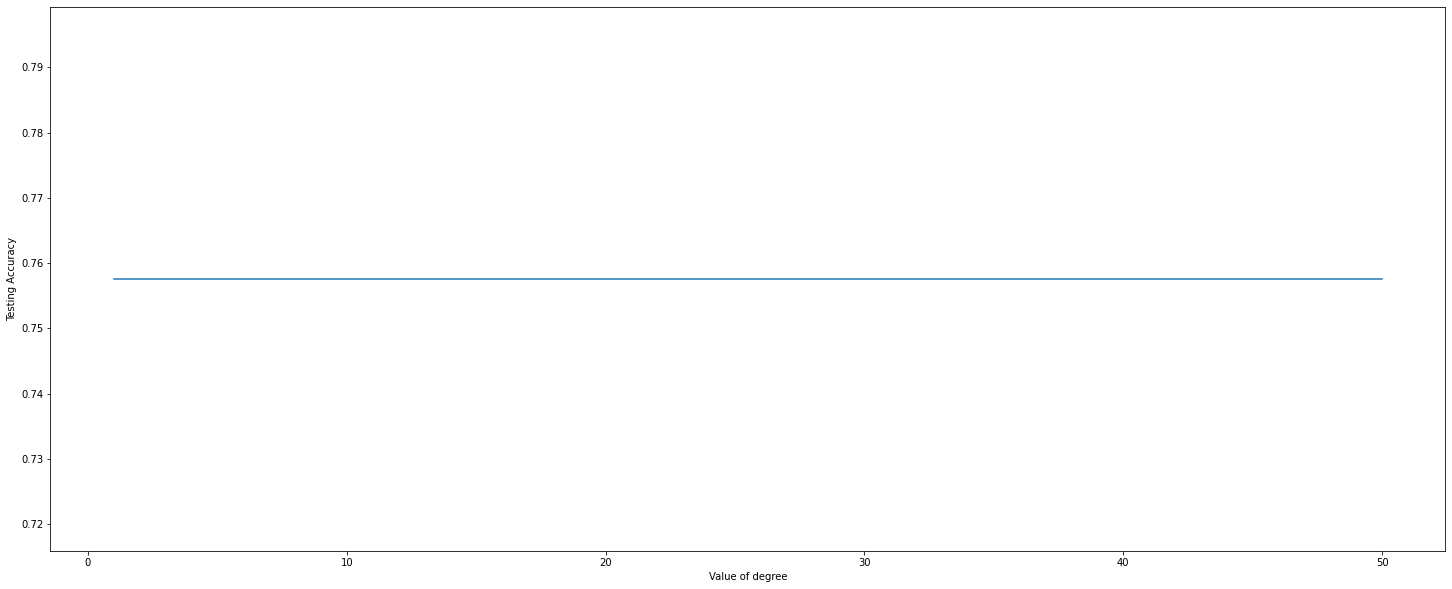

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
N=3
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = SVC(kernel = best, random_state = 0,degree=k)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of degree')
plt.ylabel ('Testing Accuracy')

best_degree=list(scores.keys())[scores_list.index(max(scores_list))]

In [76]:
from sklearn.svm import SVC
classifier = SVC(kernel = best,random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["SVM Best Karnel"]=accuracy_score(y_test, y_pred)

[[32  7]
 [ 9 18]]
              precision    recall  f1-score   support

     Control       0.78      0.82      0.80        39
     Patient       0.72      0.67      0.69        27

    accuracy                           0.76        66
   macro avg       0.75      0.74      0.75        66
weighted avg       0.76      0.76      0.76        66

Accurecy:  0.7575757575757576


In [77]:
from sklearn.svm import SVC
classifier = SVC(degree=best_degree,random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["XGB Best Estimator"]=accuracy_score(y_test, y_pred)

[[33  6]
 [11 16]]
              precision    recall  f1-score   support

     Control       0.75      0.85      0.80        39
     Patient       0.73      0.59      0.65        27

    accuracy                           0.74        66
   macro avg       0.74      0.72      0.72        66
weighted avg       0.74      0.74      0.74        66

Accurecy:  0.7424242424242424


In [78]:
from sklearn.svm import SVC
classifier = SVC(kernel = best, degree=best_degree,random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["SVM All"]=accuracy_score(y_test, y_pred)

[[32  7]
 [ 9 18]]
              precision    recall  f1-score   support

     Control       0.78      0.82      0.80        39
     Patient       0.72      0.67      0.69        27

    accuracy                           0.76        66
   macro avg       0.75      0.74      0.75        66
weighted avg       0.76      0.76      0.76        66

Accurecy:  0.7575757575757576


#Result

In [79]:
for i in result:
  print(i," : ",result[i])
  print("---------------------------------------------------------------")

ADA Default  :  0.6666666666666666
---------------------------------------------------------------
ADA Best Estimator  :  0.7727272727272727
---------------------------------------------------------------
Graddient Boosting Default  :  0.696969696969697
---------------------------------------------------------------
Graddient Best Estimator  :  0.8181818181818182
---------------------------------------------------------------
Graddient Boost Best depth  :  0.7575757575757576
---------------------------------------------------------------
Graddient Boosting ALL  :  0.803030303030303
---------------------------------------------------------------
KNN Default  :  0.7121212121212122
---------------------------------------------------------------
KNN Best Neighbors  :  0.7575757575757576
---------------------------------------------------------------
Random Forest Default  :  0.7272727272727273
---------------------------------------------------------------
Random Forest Best Estimator  :  